In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [163]:
df = pd.read_excel('gdp4countries.xlsx')

In [164]:
df.head(6)

,Series Name,Series Code,Country Name,Country Code,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,GDP (current US$),NY.GDP.MKTP.CD,India,IND,7.146319e+10,8.551527e+10,9.952590e+10,9.847280e+10,1.027172e+11,1.214873e+11,...,1.827638e+12,1.856722e+12,2.039127e+12,2.103588e+12,2.294798e+12,2.651473e+12,2.702930e+12,2.831552e+12,2.667688e+12,3.176295e+12
1,GDP (current US$),NY.GDP.MKTP.CD,United States,USA,1.279110e+12,1.425376e+12,1.545243e+12,1.684904e+12,1.873412e+12,2.081826e+12,...,1.625397e+13,1.684319e+13,1.755068e+13,1.820602e+13,1.869511e+13,1.947734e+13,2.053306e+13,2.138098e+13,2.106047e+13,2.331508e+13
2,GDP (current US$),NY.GDP.MKTP.CD,Australia,AUS,5.204206e+10,6.383216e+10,8.896389e+10,9.730438e+10,1.050662e+11,1.103510e+11,...,1.546892e+12,1.576380e+12,1.467545e+12,1.350616e+12,1.206535e+12,1.326516e+12,1.428289e+12,1.392228e+12,1.326901e+12,1.552667e+12
3,GDP (current US$),NY.GDP.MKTP.CD,China,CHN,1.136876e+11,1.385443e+11,1.441821e+11,1.634316e+11,1.539405e+11,1.749381e+11,...,8.532230e+12,9.570406e+12,1.047568e+13,1.106155e+13,1.123328e+13,1.231041e+13,1.389482e+13,1.427994e+13,1.468767e+13,1.773406e+13
4,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,India,IND,-5.533013e-01,3.295521e+00,1.185336e+00,9.149912e+00,1.663104e+00,7.254765e+00,...,5.456389e+00,6.386106e+00,7.410228e+00,7.996254e+00,8.256306e+00,6.795383e+00,6.453851e+00,3.737919e+00,-6.596081e+00,8.681229e+00
5,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,United States,USA,5.258907e+00,5.645723e+00,-5.405517e-01,-2.054561e-01,5.388139e+00,4.624153e+00,...,2.280688e+00,1.841875e+00,2.287776e+00,2.706370e+00,1.667472e+00,2.241921e+00,2.945385e+00,2.294439e+00,-2.767803e+00,5.945485e+00


In [165]:
print(df.columns)

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '1972 [YR1972]', '1973 [YR1973]', '1974 [YR1974]', '1975 [YR1975]',
       '1976 [YR1976]', '1977 [YR1977]', '1978 [YR1978]', '1979 [YR1979]',
       '1980 [YR1980]', '1981 [YR1981]', '1982 [YR1982]', '1983 [YR1983]',
       '1984 [YR1984]', '1985 [YR1985]', '1986 [YR1986]', '1987 [YR1987]',
       '1988 [YR1988]', '1989 [YR1989]', '1990 [YR1990]', '1991 [YR1991]',
       '1992 [YR1992]', '1993 [YR1993]', '1994 [YR1994]', '1995 [YR1995]',
       '1996 [YR1996]', '1997 [YR1997]', '1998 [YR1998]', '1999 [YR1999]',
       '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]',
       '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]',
       '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]',
       '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]',
       '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]',
       '2020 [YR2020]', '2021 [

In [166]:
import re

def rename_year_columns(df):
   
    # Define a regular expression pattern to match year names in column names
    pattern = r"\[YR(\d{4})\]"
    
    # Loop over all column names and rename any that match the pattern
    for col in df.columns:
        match = re.search(pattern, col)
        if match:
            year = match.group(1)
            new_name = year[-4:]
            df.rename(columns={col: new_name}, inplace=True)
    
    return df


In [167]:
# Rename the year columns using the function
df = rename_year_columns(df)
df = df.drop('Series Code', axis=1)

In [168]:
df.head(8)

,Series Name,Country Name,Country Code,1972,1973,1974,1975,1976,1977,1978,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,GDP (current US$),India,IND,7.146319e+10,8.551527e+10,9.952590e+10,9.847280e+10,1.027172e+11,1.214873e+11,1.373003e+11,...,1.827638e+12,1.856722e+12,2.039127e+12,2.103588e+12,2.294798e+12,2.651473e+12,2.702930e+12,2.831552e+12,2.667688e+12,3.176295e+12
1,GDP (current US$),United States,USA,1.279110e+12,1.425376e+12,1.545243e+12,1.684904e+12,1.873412e+12,2.081826e+12,2.351599e+12,...,1.625397e+13,1.684319e+13,1.755068e+13,1.820602e+13,1.869511e+13,1.947734e+13,2.053306e+13,2.138098e+13,2.106047e+13,2.331508e+13
2,GDP (current US$),Australia,AUS,5.204206e+10,6.383216e+10,8.896389e+10,9.730438e+10,1.050662e+11,1.103510e+11,1.184954e+11,...,1.546892e+12,1.576380e+12,1.467545e+12,1.350616e+12,1.206535e+12,1.326516e+12,1.428289e+12,1.392228e+12,1.326901e+12,1.552667e+12
3,GDP (current US$),China,CHN,1.136876e+11,1.385443e+11,1.441821e+11,1.634316e+11,1.539405e+11,1.749381e+11,1.495408e+11,...,8.532230e+12,9.570406e+12,1.047568e+13,1.106155e+13,1.123328e+13,1.231041e+13,1.389482e+13,1.427994e+13,1.468767e+13,1.773406e+13
4,GDP growth (annual %),India,IND,-5.533013e-01,3.295521e+00,1.185336e+00,9.149912e+00,1.663104e+00,7.254765e+00,5.712532e+00,...,5.456389e+00,6.386106e+00,7.410228e+00,7.996254e+00,8.256306e+00,6.795383e+00,6.453851e+00,3.737919e+00,-6.596081e+00,8.681229e+00
5,GDP growth (annual %),United States,USA,5.258907e+00,5.645723e+00,-5.405517e-01,-2.054561e-01,5.388139e+00,4.624153e+00,5.535305e+00,...,2.280688e+00,1.841875e+00,2.287776e+00,2.706370e+00,1.667472e+00,2.241921e+00,2.945385e+00,2.294439e+00,-2.767803e+00,5.945485e+00
6,GDP growth (annual %),Australia,AUS,3.910284e+00,2.619376e+00,4.106973e+00,1.336310e+00,2.588771e+00,3.594833e+00,8.931497e-01,...,3.902008e+00,2.578754e+00,2.579017e+00,2.152736e+00,2.730548e+00,2.282184e+00,2.883045e+00,2.171396e+00,-5.088534e-02,2.236212e+00
7,GDP growth (annual %),China,CHN,3.810000e+00,7.760000e+00,2.310000e+00,8.720000e+00,-1.570000e+00,7.570000e+00,1.132598e+01,...,7.863736e+00,7.766150e+00,7.425764e+00,7.041329e+00,6.848762e+00,6.947201e+00,6.749774e+00,5.950501e+00,2.239702e+00,8.109793e+00


In [169]:

GDP = df.iloc[:4, :]
GDPgrowth = df.iloc[4:8, :]

In [170]:
GDP.head()

,Series Name,Country Name,Country Code,1972,1973,1974,1975,1976,1977,1978,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,GDP (current US$),India,IND,7.146319e+10,8.551527e+10,9.952590e+10,9.847280e+10,1.027172e+11,1.214873e+11,1.373003e+11,...,1.827638e+12,1.856722e+12,2.039127e+12,2.103588e+12,2.294798e+12,2.651473e+12,2.702930e+12,2.831552e+12,2.667688e+12,3.176295e+12
1,GDP (current US$),United States,USA,1.279110e+12,1.425376e+12,1.545243e+12,1.684904e+12,1.873412e+12,2.081826e+12,2.351599e+12,...,1.625397e+13,1.684319e+13,1.755068e+13,1.820602e+13,1.869511e+13,1.947734e+13,2.053306e+13,2.138098e+13,2.106047e+13,2.331508e+13
2,GDP (current US$),Australia,AUS,5.204206e+10,6.383216e+10,8.896389e+10,9.730438e+10,1.050662e+11,1.103510e+11,1.184954e+11,...,1.546892e+12,1.576380e+12,1.467545e+12,1.350616e+12,1.206535e+12,1.326516e+12,1.428289e+12,1.392228e+12,1.326901e+12,1.552667e+12
3,GDP (current US$),China,CHN,1.136876e+11,1.385443e+11,1.441821e+11,1.634316e+11,1.539405e+11,1.749381e+11,1.495408e+11,...,8.532230e+12,9.570406e+12,1.047568e+13,1.106155e+13,1.123328e+13,1.231041e+13,1.389482e+13,1.427994e+13,1.468767e+13,1.773406e+13


In [171]:
GDP = GDP.drop(['Series Name','Country Name','Country Code'], axis=1)
GDP = GDP.T
GDP.index.name = 'Year'
GDP.head()

,0,1,2,3
Year,,,,
1972,7.146319e+10,1.279110e+12,5.204206e+10,1.136876e+11
1973,8.551527e+10,1.425376e+12,6.383216e+10,1.385443e+11
1974,9.952590e+10,1.545243e+12,8.896389e+10,1.441821e+11
1975,9.847280e+10,1.684904e+12,9.730438e+10,1.634316e+11
1976,1.027172e+11,1.873412e+12,1.050662e+11,1.539405e+11


In [172]:
#print(GDP.columns)

In [173]:

GDP.columns =['India', 'United States', 'Australia', 'China']
GDP.index.name = 'Year'
GDP = GDP.reset_index()

In [174]:
GDP.head()

,Year,India,United States,Australia,China
0,1972,7.146319e+10,1.279110e+12,5.204206e+10,1.136876e+11
1,1973,8.551527e+10,1.425376e+12,6.383216e+10,1.385443e+11
2,1974,9.952590e+10,1.545243e+12,8.896389e+10,1.441821e+11
3,1975,9.847280e+10,1.684904e+12,9.730438e+10,1.634316e+11
4,1976,1.027172e+11,1.873412e+12,1.050662e+11,1.539405e+11


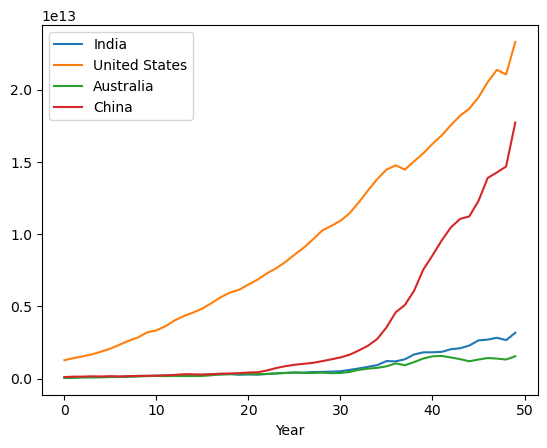

In [180]:
GDP.plot()
plt.legend(loc='upper left')
plt.xlabel("Year")
plt.show()

In [175]:
GDPgrowth = GDPgrowth.drop(['Series Name','Country Name','Country Code'], axis=1)
GDPgrowth = GDPgrowth.T
GDPgrowth.index.name = 'Year'
GDPgrowth.head()

,4,5,6,7
Year,,,,
1972,-0.553301,5.258907,3.910284,3.81
1973,3.295521,5.645723,2.619376,7.76
1974,1.185336,-0.540552,4.106973,2.31
1975,9.149912,-0.205456,1.336310,8.72
1976,1.663104,5.388139,2.588771,-1.57


In [176]:
GDPgrowth.columns =['India', 'United States', 'Australia', 'China']
GDPgrowth.index.name = 'Year'
GDPgrowth = GDPgrowth.reset_index()
GDPgrowth.head()

,Year,India,United States,Australia,China
0,1972,-0.553301,5.258907,3.910284,3.81
1,1973,3.295521,5.645723,2.619376,7.76
2,1974,1.185336,-0.540552,4.106973,2.31
3,1975,9.149912,-0.205456,1.336310,8.72
4,1976,1.663104,5.388139,2.588771,-1.57


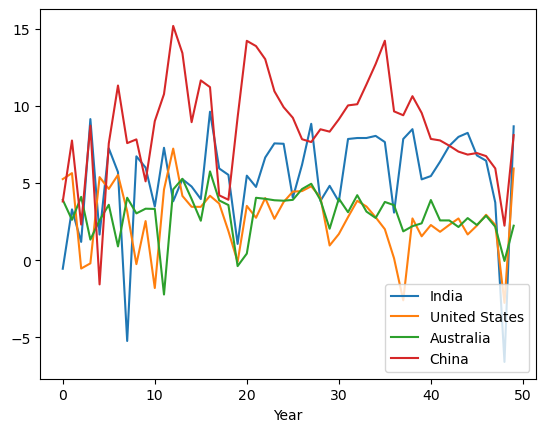

In [177]:
GDPgrowth.plot()
plt.legend(loc='lower right')
plt.xlabel("Year")
plt.show()